In [9]:
import pandas as pd

datasetRetail = pd.read_excel('Online_retail.xlsx')

# Group the dataset by CustomerID
customers_grouped = datasetRetail.groupby('CustomerID')

# Creates an empty dictionary to store the items bought by each customer
# ID : Description, Quantity
customer_items = {}

# Iterates through each customer
for customer_id, group_data in customers_grouped:

    # Checks if customer_id is already in dictionary
    if not (customer_id in customer_items.keys()):
        customer_items[customer_id] = []

    # For each costumer_id, it adds the product to that costumer
    for i in range(len(group_data["Country"].values)):
        dataset_values = {
                          "Description": group_data["Description"].values[i],
                          "Quantity": group_data["Quantity"].values[i]
                          }

        if(group_data["Quantity"].values[i] > 0):
            customer_items[customer_id].append(dataset_values)

In [23]:
#----------------- Accounting null CustomerID's and Products reimbursed -----------------#

# Checks if CustomerID is null and counts it if true
category_counts_nullIDs = (datasetRetail['CustomerID'].isna() == True).value_counts()
print(category_counts_nullIDs) #135080 null CustomerID's

category_counts_products_reimbursed = (datasetRetail['Quantity'] <= 0).value_counts()
#print(category_counts_products_reimbursed) #10624 products reimbursed

CustomerID
False    406829
True     135080
Name: count, dtype: int64


In [21]:
#----------------- Filtering the DataFrame -----------------#

# Filter the DataFrame where 'Quantity' needs to be greater than 0 (531285) and CustomerID not null (406829)
filtered_data_quantity = datasetRetail[(datasetRetail['Quantity'] > 0) & (datasetRetail['CustomerID'].isna() == False)]
#print(filtered_data_quantity) #397924

In [11]:
#----------------- Distinct Product Count  -----------------#

# Check if any rows satisfy the condition
if not filtered_data_quantity.empty:
    category_counts_stockcode = filtered_data_quantity['StockCode'].value_counts()
    #print(category_counts_stockcode)

In [12]:
#----------------- Distinct Countries -----------------#

# Counts the different countries through the dataset
category_counts_country = filtered_data_quantity['Country'].value_counts()
#print(len(category_counts_country))

In [13]:
#----------------- Distinct Client Count -----------------#

# Counts the different clients through the dataset
category_counts_customerID = filtered_data_quantity['CustomerID'].dropna().value_counts()
#print(category_counts_customerID) #4339

In [14]:
#----------------- Distinct Purcheses Done -----------------#

category_counts_invoiceNo = filtered_data_quantity['InvoiceNo'].value_counts()
#print(category_counts_invoiceNo)
#Purchases reimbursed: 5172

array([[<Axes: xlabel='CustomerID', ylabel='CustomerID'>]], dtype=object)

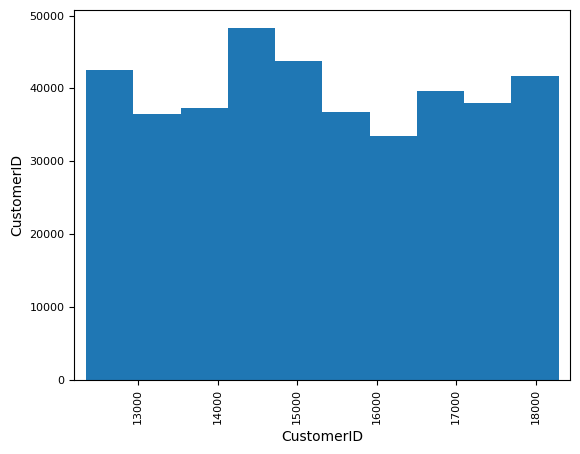

In [6]:
#---------------- Scatter Plot Purchases ----------------#

purchases_variables = filtered_data_quantity[["StockCode", "CustomerID", "InvoiceNo", "InvoiceDate"]]
pd.plotting.scatter_matrix(purchases_variables)

In [7]:
#---------------- Products reimbursed ----------------#

filtered_data_InvoiceNo = datasetRetail[(datasetRetail['Quantity'] > 0)]

products_reimbursed = len(datasetRetail['InvoiceNo']) - len(filtered_data_InvoiceNo['InvoiceNo'])
#print(products_reimbursed) #10624

In [8]:
#---------------- Purchases with no client ID ----------------#

empty_values_count = datasetRetail['CustomerID'].isna().sum()
#print(empty_values_count) #135080

In [9]:
#---------------- Rate Products reimbursed ----------------#

reimbursement_rate = (products_reimbursed / len(datasetRetail['InvoiceNo'])) * 100
#print(reimbursement_rate) #1.9604767590130447

In [10]:
#---------------- Rate Purchases with no ClientID ----------------#

noClientID_rate = (empty_values_count / len(datasetRetail['CustomerID'])) * 100
print(noClientID_rate) #24.926694334288598

24.926694334288598


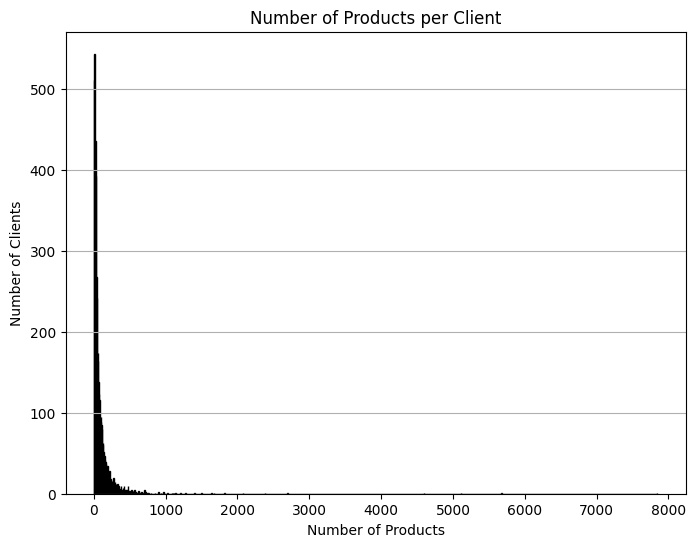

In [11]:
import matplotlib.pyplot as plt
# Group by CustomerID and count the number of products for each customer
products_per_client = filtered_data_quantity.groupby('CustomerID')['InvoiceNo'].count()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(products_per_client, bins=1000, color='skyblue', edgecolor='black')
plt.title('Number of Products per Client')
plt.xlabel('Number of Products')
plt.ylabel('Number of Clients')
plt.grid(axis='y')
plt.show()

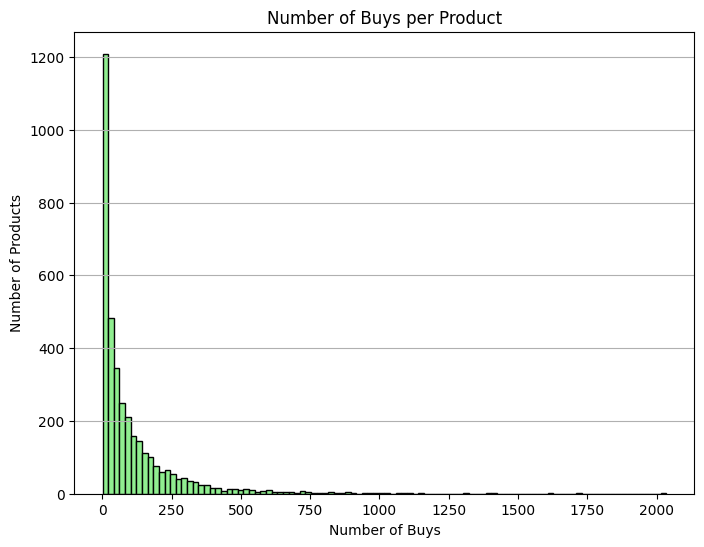

In [12]:
# Count the number of purchases for each product
buys_per_product = filtered_data_quantity['StockCode'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(buys_per_product, bins=100, color='lightgreen', edgecolor='black')
plt.title('Number of Buys per Product')
plt.xlabel('Number of Buys')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.show()

C:\Users\João Serras\AppData\Local\Temp\ipykernel_11032\1512895939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_quantity['InvoiceDate'] = pd.to_datetime(filtered_data_quantity['InvoiceDate'])


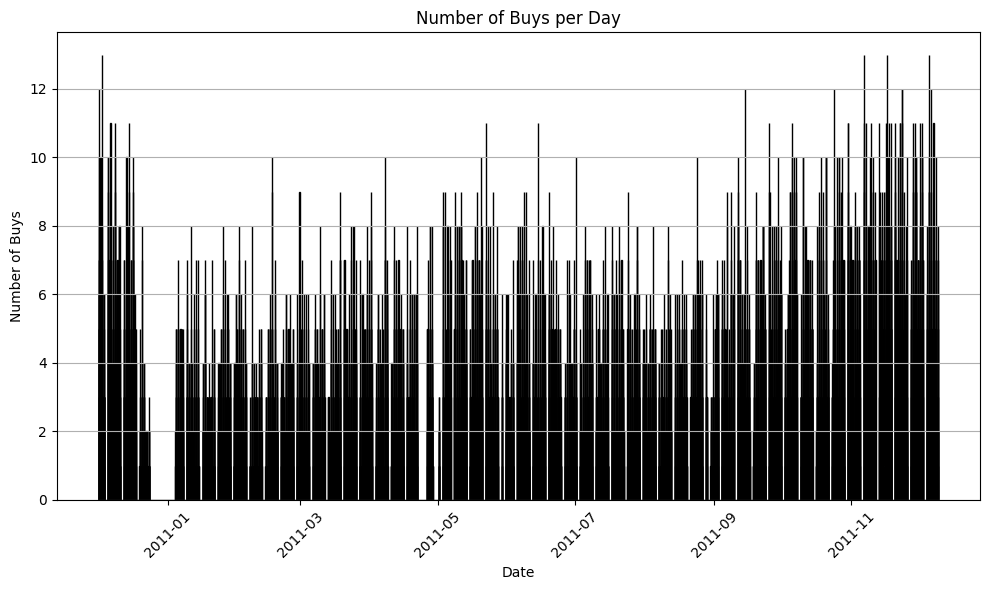

In [13]:
filtered_data_quantity['InvoiceDate'] = pd.to_datetime(filtered_data_quantity['InvoiceDate'])

#Group by PurchaseDate and count the number of buys for each day
buys_per_day = filtered_data_quantity['InvoiceDate'].value_counts().sort_index()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(buys_per_day.index, bins=len(buys_per_day), color='skyblue', edgecolor='black')
plt.title('Number of Buys per Day')
plt.xlabel('Date')
plt.ylabel('Number of Buys')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#----------------- Customer Distinction  -----------------#

#TODO

# Through the dataset, we check what type of clients we have.
# In a year, if a client made below 100 purchases, we consider as a normal client
# In a year, if a client made between 100 and 364 purchases, we consider as a daily client
# In a year, if a client made between 365 and 7962 purchases, we consider as big client
normal_clients = 0
daily_clients = 0
big_clients = 0

for client_id, purchases in customer_items.items():
    if len(purchases) < 100:
        normal_clients += 1
    elif 100 <= len(purchases) < 365:
        daily_clients += 1
    elif 365 <= len(purchases) < 7963:
        big_clients += 1
    else:
        print(f"Error for ClientID {client_id}: Unexpected number of purchases - {len(purchases)}")

print(normal_clients)
print(daily_clients)
print(big_clients)

3281
929
162


In [15]:
#----------------- Client-Product Relation -----------------#

customer_data = []

for id in customer_items.keys():
    for customer_item in customer_items.get(id):
        array_values = {
            "CustomerID" : id,
            "Description" : customer_item["Description"],
            "Quantity" : customer_item["Quantity"]
        }
        customer_data.append(array_values)

In [16]:
#----------------- Product-Product Relation -----------------#

output_dataframe = pd.DataFrame(customer_data)

# Agroup the data by customerID, StockCode and their quantity
output_agg = datasetRetail.groupby(['CustomerID', 'StockCode']).agg({'Quantity': 'sum'})

# Creates the correct index
output_agg.reset_index(inplace=True)

# Merge the dataframe to create the relation needed
output_agg = pd.merge(output_agg, output_agg, how='inner', on='CustomerID')

# Filters the output, where it only gives the products that are different
result_df = output_agg[output_agg['StockCode_x'] != output_agg['StockCode_y']]

# Get the dataframe with only the products and CustomerID
result_df[['CustomerID', 'StockCode_x', 'StockCode_y']]


,CustomerID,StockCode_x,StockCode_y
2,12347.0,16008,17021
3,12347.0,16008,20665
4,12347.0,16008,20719
5,12347.0,16008,20780
6,12347.0,16008,20782
...,...,...,...
48278165,18287.0,85040A,72351A
48278166,18287.0,85040A,72351B
48278167,18287.0,85040A,84507C
48278168,18287.0,85040A,85039A


In [ ]:
#----------------- Export Results -----------------#

file_path = 'OutputData.csv'

output_dataframe.to_csv(file_path, index=False)